Here are the pairs. 

| futuresTicker | stockTicker |
| ------------- | ----------- |
| JBF           | 3443        |
| QWF           | 2388        |
| HCF           | 2498        |
| DBF           | 2610        |
| EHF           | 1319        |
| IPF           | 3035        |
| IIF           | 3006        |
| QXF           | 2615        |
| PEF           | 5425        |
| NAF           | 3105        |



In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

%matplotlib inline

In [133]:
# Load the dir
futureOBDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresOB/"
futureTradeDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresTrades/"
stockDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/stocks/"

In [134]:
colNames = ['date', 'time', 'askPrice5', 'askPrice4', 'askPrice3', 'askPrice2',
       'askPrice1', 'bidPrice1', 'bidPrice2', 'bidPrice3', 'bidPrice4',
       'bidPrice5', 'askSize5', 'askSize4', 'askSize3', 'askSize2', 'askSize1',
       'bidSize1', 'bidSize2', 'bidSize3', 'bidSize4', 'bidSize5', 'symbol']

In [135]:
def combineFutureData(name):  # name is the future code, type is string
    futureFileList = []
    for i in os.listdir(futureOBDir + name + "/"):
        futureFileList.append(i)
    # futureFileList.remove('.DS_Store')
    futureFileList = sorted(futureFileList)
    futureData = pd.DataFrame([], columns=colNames)
    for file in futureFileList:
        if file[-1] == 'v':
            futureOB_data = pd.read_csv(futureOBDir + name + '/' + file)
        else: 
            futureOB_data = pd.read_csv(futureOBDir + name + '/' + file, compression='gzip')
        futureData = pd.concat([futureData, futureOB_data])
        futureData = futureData.reset_index(drop=True)
        futureData['midQ'] = ((futureData['askPrice1'] + futureData['bidPrice1']) / 2).astype(float)
    return futureData

In [136]:
futureData = combineFutureData('DBF')

In [137]:
futureData

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
0,2022-08-31,84500110,2295,2285,2260,2255,2250,2215,2205,2200,...,1,5,22,5,10,2,4,4,DBFI2.cs,2232.5
1,2022-08-31,84502964,2295,2285,2260,2255,2250,2215,2205,2200,...,1,5,22,6,10,2,4,4,DBFI2.cs,2232.5
2,2022-08-31,84520213,2295,2285,2260,2255,2250,2215,2205,2200,...,1,5,22,6,10,3,4,4,DBFI2.cs,2232.5
3,2022-08-31,84547713,2285,2260,2255,2250,2240,2215,2205,2200,...,5,22,3,6,10,3,4,4,DBFI2.cs,2227.5
4,2022-08-31,84550338,2285,2260,2255,2250,2240,2215,2205,2200,...,5,22,3,7,10,2,4,4,DBFI2.cs,2227.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792898,2023-06-30,134405727,2655,2650,2645,2640,2635,2630,2625,2620,...,5,11,5,2,6,29,17,11,DBFG3.cs,2632.5
792899,2023-06-30,134410727,2655,2650,2645,2640,2635,2630,2625,2620,...,5,11,1,2,6,29,17,11,DBFG3.cs,2632.5
792900,2023-06-30,134434227,2655,2650,2645,2640,2635,2630,2625,2620,...,5,11,1,2,6,29,17,11,DBFG3.cs,2632.5
792901,2023-06-30,134441602,2655,2650,2645,2640,2635,2625,2620,2615,...,5,11,1,5,29,17,11,17,DBFG3.cs,2630.0


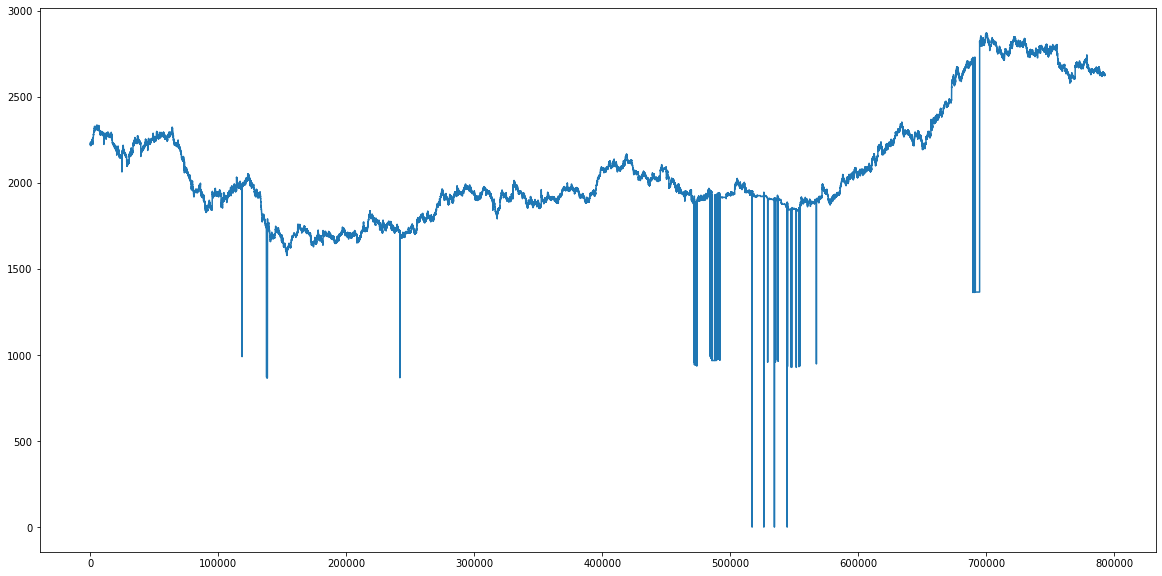

In [138]:
#plot the midQ
plt.figure(figsize=(20,10))
plt.plot(futureData['midQ'])

In [139]:
def combineStockData(name):
    stockFileList = []
    for i in os.listdir(stockDir + name + "/"):
        stockFileList.append(i)
    # stockFileList.remove('.DS_Store')
    stockFileList = sorted(stockFileList)
    stockData = pd.DataFrame([], columns=stoColNames)
    for file in stockFileList:
        stock_data = pd.read_csv(stockDir + name + '/' + file, compression='gzip', index_col=0)
        stockData = pd.concat([stockData, stock_data])
    stockData = stockData.reset_index(drop=True)
    return stockData

In [140]:
stoColNames = ['date', 'time', 'lastPx', 'size', 'volume', 'SP5', 'SP4', 'SP3', 'SP2',
       'SP1', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'SV5', 'SV4', 'SV3', 'SV2',
       'SV1', 'BV1', 'BV2', 'BV3', 'BV4', 'BV5']

In [141]:
stockData = combineStockData('1319')

In [142]:
stockData

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5,Unnamed: 0.1
0,2020-07-01,90023105,3670.0,5.0,5,3700.0,3695.0,3690.0,3680.0,3670.0,...,3,1,1,8,1,7,20,21,3,NaN
1,2020-07-01,90025201,NaN,NaN,5,3700.0,3695.0,3690.0,3680.0,3670.0,...,4,1,1,8,1,7,20,21,3,NaN
2,2020-07-01,90035492,3670.0,1.0,6,3700.0,3695.0,3690.0,3680.0,3670.0,...,4,1,1,7,1,7,20,21,3,NaN
3,2020-07-01,90039927,NaN,NaN,6,3700.0,3695.0,3690.0,3680.0,3670.0,...,4,1,1,7,1,9,20,21,3,NaN
4,2020-07-01,90053917,3670.0,5.0,11,3700.0,3695.0,3690.0,3680.0,3670.0,...,4,1,1,2,1,9,20,21,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481001,2023-06-30,132449080,5250.0,1.0,1960,5290.0,5280.0,5270.0,5260.0,5250.0,...,131,35,18,14,30,41,87,65,155,NaN
4481002,2023-06-30,132449137,NaN,NaN,1960,5290.0,5280.0,5270.0,5260.0,5250.0,...,131,35,18,14,30,41,42,65,155,NaN
4481003,2023-06-30,132449137,NaN,NaN,1960,5290.0,5280.0,5270.0,5260.0,5250.0,...,92,35,18,14,30,41,42,65,155,NaN
4481004,2023-06-30,132453609,NaN,NaN,1960,5290.0,5280.0,5270.0,5260.0,5250.0,...,92,34,19,14,30,41,42,65,155,NaN


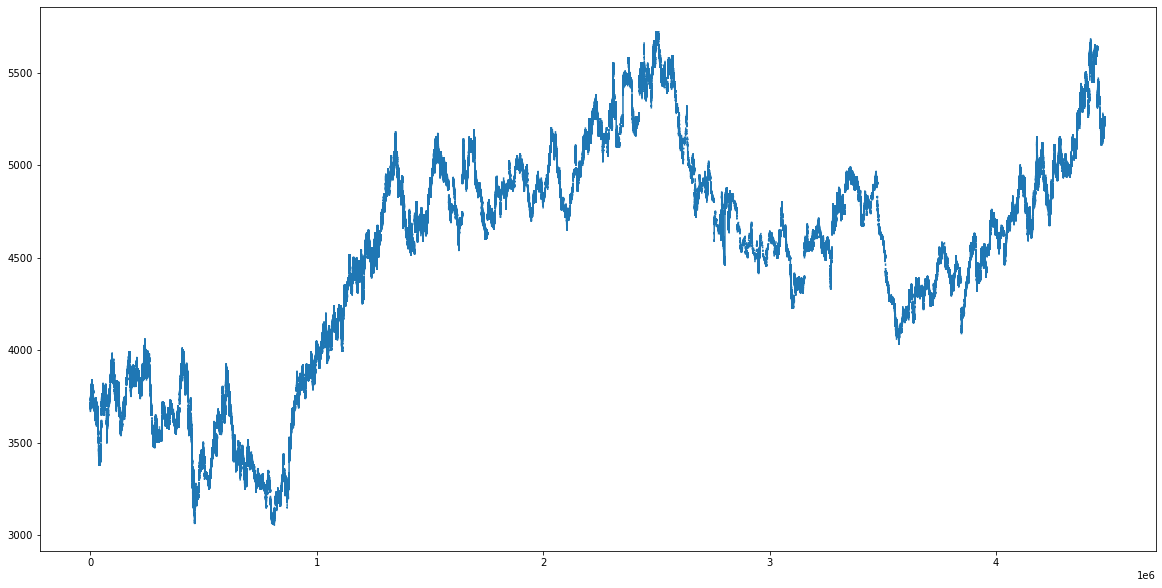

In [143]:
plt.figure(figsize=(20,10))
plt.plot(stockData['lastPx'])

In [144]:
def findCommonDay(stockData, futureData):
    stockData_dates = np.unique(stockData.date)
    stoD = pd.to_datetime(stockData_dates, format="%Y-%m-%d")
    qqqq = stoD.year * 10000 + stoD.month * 100 + stoD.day
    futureData_dates = np.unique(futureData.date)
    indD = pd.to_datetime(futureData_dates, format="%Y-%m-%d")
    pppp = indD.year * 10000 + indD.month * 100 + indD.day
    commonDays = pd.to_datetime(pppp.intersection(qqqq),format="%Y%m%d")
    return commonDays

In [145]:
commonDays = findCommonDay(stockData, futureData)

In [146]:
commonDays

DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15',
               ...
               '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', length=196, freq=None)

In [147]:
def indexStockFuture(stockData, futureData, commonDays):
    ## With common days generated for both stock and futures, we synchronize days first
    d_futures = pd.to_datetime(futureData.date, format="%Y-%m-%d")
    futureData.date = d_futures
    futureData = futureData[futureData.date.isin(commonDays)]

    d_stock = pd.to_datetime(stockData.date, format="%Y-%m-%d")
    stockData.date = d_stock
    stockData = stockData[stockData.date.isin(commonDays)]

    ## In order to synchronize trade time, too, we create indexes for both dataframes that have the same format
    stockData_DateTime = pd.to_datetime(stockData.date.astype(str) + ' ' + stockData.time.astype(str), format="%Y-%m-%d %H%M%S%f")
    futuresData_DateTime = pd.to_datetime(futureData.date.astype(str) + ' ' + futureData.time.astype(str), format="%Y-%m-%d %H%M%S%f")

    stockData.index = stockData_DateTime
    stockData = stockData[~stockData.index.duplicated(keep='last')]   

    futureData.index = futuresData_DateTime
    futureData = futureData[~futureData.index.duplicated(keep='last')]
    return stockData, futureData

In [148]:
stockData, futureData = indexStockFuture(stockData, futureData, commonDays)

In [149]:
def syncStock(stockData, futureData):
    ## Now, we synchronize the timestamps of the two time series; here, we downsample the time series with more time stamps
    ### First, we union the indexes
    new_index1 = stockData.index.union(futureData.index)
    new_index = np.unique(new_index1)

    ### Next, we insert stock time stamps to index futures data
    resampledStockData = stockData.reindex(new_index)

    ### Then, we forward fill nan's in the index futures data so that date and time will not be nan's
    resampledStockData.fillna(method='ffill',inplace=True)
    stockData_downsampled = resampledStockData.loc[futureData.index]
    return stockData_downsampled

In [150]:
stockData_downsampled = syncStock(stockData, futureData)

In [151]:
len(stockData_downsampled), len(futureData)

(782449, 782449)

In [164]:
stockPrice = stockData_downsampled['lastPx']
na_index = stockPrice.isna()
stockPrice = stockPrice[~na_index]
futurePrice = futureData['midQ']
futurePrice = futurePrice[~na_index]

In [167]:
gamma = stockPrice[0] / futurePrice[0]

In [172]:
X = np.log(stockPrice) - gamma * np.log(futurePrice)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [173]:
futurePrice

2022-09-01 09:00:10.845    2260.0
2022-09-01 09:00:10.970    2260.0
2022-09-01 09:00:11.095    2255.0
2022-09-01 09:00:11.220    2255.0
2022-09-01 09:00:11.344    2257.5
                            ...  
2023-06-30 13:44:05.727    2632.5
2023-06-30 13:44:10.727    2632.5
2023-06-30 13:44:34.227    2632.5
2023-06-30 13:44:41.602    2630.0
2023-06-30 13:44:59.102    2630.0
Name: midQ, Length: 782248, dtype: float64